In [3]:
# ----- Gemeinsames Tutoriakl am 27.04.2021 -----
# ----- https://www.tensorflow.org/tutorials/keras/classification -----

# TensorFlow and tf.keras
import tensorflow as tf
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


(60000, 28, 28)


In [4]:
print("Trainingsset mit 60.000 Bildern, die jeweils 28px x 28px groß sind:", train_images.shape)

Trainingsset mit 60.000 Bildern, die jeweils 28px x 28px groß sind: (60000, 28, 28)


In [5]:
print("Testset mit 10.000 Bildern, die jeweils 28px x 28px groß sind:", test_images.shape)

Testset mit 10.000 Bildern, die jeweils 28px x 28px groß sind: (10000, 28, 28)


# Daten-Vorbereitung
Um zu sehen, wie diese Bilder in dem Dataset vorliegen, kann man sich ein Bild heraussuchen und sich dieses anzeigen lassen.
Nachfolgend wird das erste Bild des Datasets angeschaut. Mithilfe der Funktion colorbar() wird dargestellt, wie dieses Bild (und somit alle anderen auch) vorliegt; also ob in Farbe oder in schwarz-weiß.

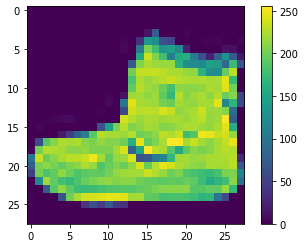

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Damit die Daten in jedem Fall auf die gleiche Weise vorliegen, werden die Bilder, welche noch in Farbe sind, in schwarz-weiß konvertiert. Hierfür dividiert man die Pixel durch 255.

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Um zu überprüfen, ob die Daten das richtige Format haben und ob Sie bereit sind, das Netzwerk aufzubauen und zu trainieren, zeigen wir die ersten 25 Bilder aus dem Trainingssatz und den Klassennamen unter jedem Bild an.

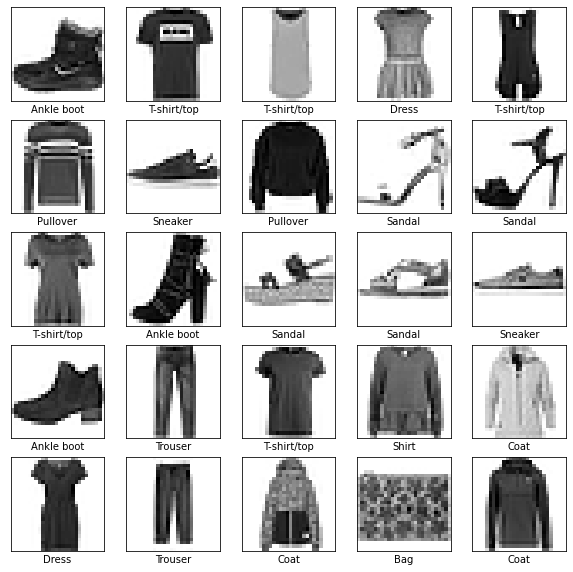

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Model-Erstellung

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Die erste Schicht in diesem Netzwerk, tf.keras.layers.Flatten , transformiert das Format der Bilder von einem zweidimensionalen Array (von 28 x 28 Pixel) in ein eindimensionales Array (von 28 * 28 = 784 Pixel).
input_shape = 

Flatten-Schicht: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten

input_shape=(28,28) ==> Größe der Bilder (28x28), die wir dem Modell übergeben wollen

tf.keras.layers.Dense(256, activation='relu') ==> Ebene des NN mit 128 Neuronen, mit der RELU Aktivierungsfunktion


tf.keras.layers.Dense(10) ==> End-Ebene, die 10 Neuronen besitzt, da wir 10 Klassen (s. class_names) klassifizieren wollen

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6066 - accuracy: 0.7872
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3744 - accuracy: 0.8632
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3299 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3040 - accuracy: 0.8874
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2851 - accuracy: 0.8936: 0s - loss: 0.2850 - accuracy: 
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2702 - accuracy: 0.8996
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2544 - accuracy: 0.9039
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2497 - accuracy: 0.9065
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2330 - accuracy: 0.9096
Epoch 10/10
1875/1875 [===========================

# Genauigkeit ausgeben

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3353 - accuracy: 0.8868

Test accuracy: 0.8867999911308289


# Voraussage machen
Wir generieren anhand des nun trainierten Modells ein neues Modell, mit dem wir Werte vorhersagen können.

In [23]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

Nun versuchen wir, die Werte für die test_images vorherzusagen.

In [26]:
predictions = probability_model.predict(test_images)

Für jeden Test-Wert wird nun ein Array mit 10 Zahlen erstellt. Diese 10 Zahlen repräsentieren das "Vertrauen" des Modells.

In [27]:
# Erster Testdatensatz
predictions[0]

array([1.7699113e-09, 4.4581965e-09, 2.5869903e-10, 3.3334824e-11,
       9.0094883e-11, 6.4733857e-04, 1.7960021e-08, 2.5388673e-03,
       1.6207485e-09, 9.9681383e-01], dtype=float32)

In [28]:
# Über np.argmax() wird die wahrscheinlichste Klasse ausgelesen
np.argmax(predictions[0])

9

In diesem Fall hat das probability_model für den Testdatensatz 0 die Klasse 9, also einen Ankle boot, vorhergesagt.
Um das zu prüfen kann man folgende Veranschaulichung erstellen:

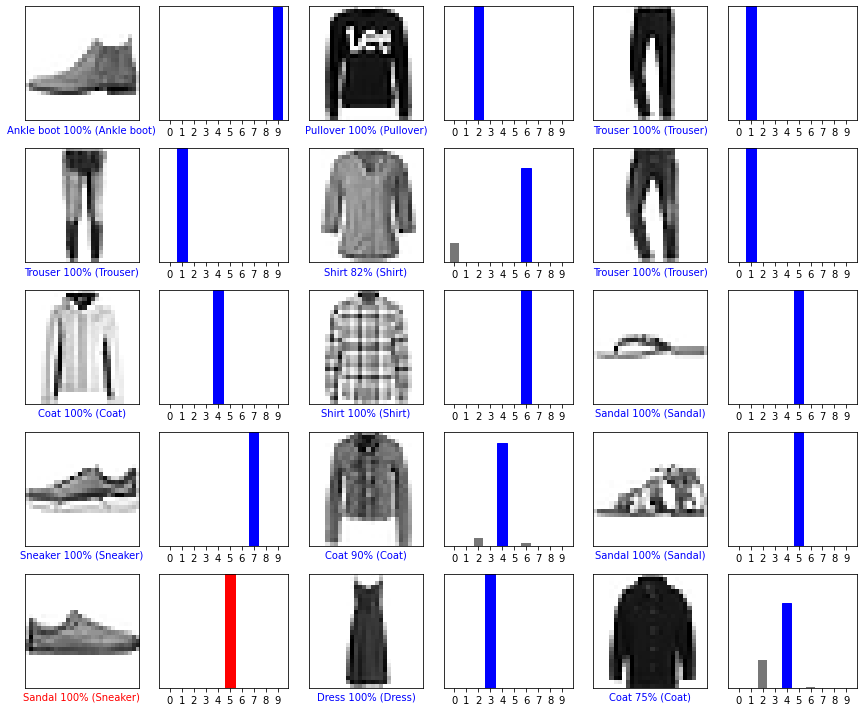

In [32]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()